In [1]:
import pandas as pd

In [2]:
nigeria1 = pd.read_excel("/Users/anushaeregowda/Documents/3rd Semester/DAEN690/Data/Nigeria_Part1.xlsx")

In [3]:
nigeria2 = pd.read_excel("/Users/anushaeregowda/Documents/3rd Semester/DAEN690/Data/Nigeria_HRR_100_Cards1_2.xlsx")

In [4]:
nigeria3 = pd.read_excel("/Users/anushaeregowda/Documents/3rd Semester/DAEN690/Data/Nigeria_HRR_100_cards3_4.xlsx")

In [5]:
NigeriaData = pd.concat([nigeria1,nigeria2,nigeria3],ignore_index=True,sort=False)

In [6]:
qryTimeRedemption = pd.read_excel("/Users/anushaeregowda/Documents/3rd Semester/DAEN690/Data/qryTimeRedemption.xlsx")

In [7]:
qryTimeRedemption_cols =qryTimeRedemption[['interviewer_id', 'average_minutes_per_hh', 'date_of_registration']]

In [8]:
NigeriaRedemption = pd.merge(NigeriaData, qryTimeRedemption_cols, how='left', left_on=['interviewer_id','date'], right_on = ['interviewer_id','date_of_registration'])

In [9]:
NigeriaRedemption['date'] = NigeriaRedemption['date'].str.split(',').str[0]

In [10]:
#Preprocessing the data from here 
pre_nigeria = NigeriaRedemption.copy()

In [11]:
pre_nigeria.shape

(1362905, 21)

In [12]:
#Checking Null values
pre_nigeria.isna().sum()

distributionPoint                0
date                             0
state                            0
lga                              0
ward                             0
hh_id                            0
noOfCards                        0
latitude                         0
longitude                        0
Origin                           0
interviewer_id                   0
dp_longitude                     0
dp_latitude                      0
Destination                      0
distanceFromDPinMiles            0
noOfCardRedeemed                 0
Overall_redemption_rate          0
average_rates_lga          1362905
hh_redemption_rate               0
average_minutes_per_hh        2452
date_of_registration          2452
dtype: int64

In [13]:
#Just to confirm, show all the indexes with null values
pre_nigeria['average_minutes_per_hh'][pre_nigeria['average_minutes_per_hh'].isna()].index

Int64Index([   3689,    3690,    6321,    6737,    6738,    6739,    6740,
               6741,    6856,   10031,
            ...
            1353559, 1353560, 1353561, 1353578, 1353581, 1353582, 1353583,
            1353585, 1353586, 1353587],
           dtype='int64', length=2452)

In [14]:
#Pick one index with null value and see their details
pre_nigeria.loc[3689,:]

distributionPoint                           Eng Oladimeji House
date                                                     Monday
state                                                      Ogun
lga                                                 Ado-Odo Ota
ward                                                      Ota 1
hh_id                                                    BHZJZN
noOfCards                                                     4
latitude                                                6.65721
longitude                                               3.23646
Origin                                          6.65721,3.23646
interviewer_id             be18f593-092a-4adc-a902-d60d1c9a74c1
dp_longitude                                            3.23388
dp_latitude                                             6.65452
Destination                                     6.65452,3.23388
distanceFromDPinMiles                                      0.26
noOfCardRedeemed                        

In [15]:
#Get the mean of average_mins_per_hh of every lga 
mean_value = pre_nigeria.groupby('lga',as_index=False)['average_minutes_per_hh'].mean()
mean_value

,lga,average_minutes_per_hh
0,Abeokuta North,12.109489
1,Abeokuta South,10.075841
2,Ado-Odo Ota,12.011790
3,Ewekoro,8.701634
4,Ifo,12.044012
5,Ijebu East,12.429775
6,Ijebu North,12.987990
7,Ijebu North East,12.905637
8,Ijebu Ode,13.375143
9,Ikenne,12.257934


In [16]:
#Replacing null values of Average mins per household by mean, grouped by lga 
pre_nigeria['average_minutes_per_hh'] = pre_nigeria['average_minutes_per_hh'].fillna(pre_nigeria.groupby('lga')['average_minutes_per_hh'].transform('mean'))

In [17]:
pre_nigeria.isna().sum()

distributionPoint                0
date                             0
state                            0
lga                              0
ward                             0
hh_id                            0
noOfCards                        0
latitude                         0
longitude                        0
Origin                           0
interviewer_id                   0
dp_longitude                     0
dp_latitude                      0
Destination                      0
distanceFromDPinMiles            0
noOfCardRedeemed                 0
Overall_redemption_rate          0
average_rates_lga          1362905
hh_redemption_rate               0
average_minutes_per_hh           0
date_of_registration          2452
dtype: int64

In [18]:
pre_nigeria.shape

(1362905, 21)

In [19]:
#Removing Avergae mins per household to max 90 mins 
pre_nigeria=pre_nigeria[(pre_nigeria['average_minutes_per_hh'] <= 90)]

In [20]:
#Removing distance >6 miles
dfindexnames=pre_nigeria[(pre_nigeria['distanceFromDPinMiles'] > 6)].index

In [21]:
dfindexnames
pre_nigeria.drop(dfindexnames , inplace=True)

In [22]:
#Adding Size of Family household 
pre_nigeria['size_of_hh'] = pre_nigeria['noOfCards']*2

In [23]:
#Dropping Columns
pre_nigeria  = pre_nigeria.drop([ 'distributionPoint','state', 'lga','ward', 'hh_id','latitude', 'longitude', 'Origin',
                      'interviewer_id', 'dp_longitude','dp_latitude', 'Destination', 'noOfCardRedeemed', 
                      'Overall_redemption_rate','average_rates_lga','date_of_registration','noOfCards'], axis=1)

In [24]:
pre_nigeria.head()

,date,distanceFromDPinMiles,hh_redemption_rate,average_minutes_per_hh,size_of_hh
0,Sunday,0.13,75,13.71,8
1,Sunday,0.15,75,13.71,8
2,Friday,0.89,75,48.00,8
3,Sunday,0.57,75,15.00,8
4,Sunday,0.73,75,14.12,8


In [25]:
#Squaring columns for a better fit of the model
pre_nigeria['distanceFromDPinMiles_SQR'] = pre_nigeria['distanceFromDPinMiles']**2
pre_nigeria['average_minutes_per_hh_SQR'] = pre_nigeria['average_minutes_per_hh']**2
pre_nigeria['size_of_hh_SQR'] = pre_nigeria['size_of_hh']**2

In [26]:
pre_nigeria['Net_redemption'] = pre_nigeria['hh_redemption_rate'].apply(lambda x: 1 if x==100 else 0)

In [27]:
pre_nigeria = pre_nigeria.drop(['hh_redemption_rate'], axis=1)

In [28]:
#One Hot encoding
pre_nigeria = pd.get_dummies(data=pre_nigeria, columns=['date'], drop_first=True)

In [29]:
pre_nigeria.head()

,distanceFromDPinMiles,average_minutes_per_hh,size_of_hh,distanceFromDPinMiles_SQR,average_minutes_per_hh_SQR,size_of_hh_SQR,Net_redemption,date_Monday,date_Saturday,date_Sunday,date_Thursday,date_Tuesday,date_Wednesday
0,0.13,13.71,8,0.0169,187.9641,64,0,0,0,1,0,0,0
1,0.15,13.71,8,0.0225,187.9641,64,0,0,0,1,0,0,0
2,0.89,48.00,8,0.7921,2304.0000,64,0,0,0,0,0,0,0
3,0.57,15.00,8,0.3249,225.0000,64,0,0,0,1,0,0,0
4,0.73,14.12,8,0.5329,199.3744,64,0,0,0,1,0,0,0


In [30]:
#End of preprocessing - copy to another variable for easier run
nigeriaRedemption = pre_nigeria.copy()

In [31]:
#Target Variable
Y=nigeriaRedemption["Net_redemption"]

#Independent/Input Variables
X=nigeriaRedemption.drop(columns = ['Net_redemption'])

In [32]:
target_count=nigeriaRedemption['Net_redemption'].value_counts()

In [33]:
target_count

1    1125207
0     203468
Name: Net_redemption, dtype: int64

In [34]:
X_Columns = X.columns

In [35]:
#Oversampling(X, Y) -> X,Y
#Train and Test Split(X,Y) -> X_train, X_test, y_train, y_test
#Modelling
#k fold

In [36]:
#smote analysis
print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X, Y = sm.fit_sample(X, Y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(Y == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y == 0))) 

Before OverSampling, counts of label '1': 1125207
Before OverSampling, counts of label '0': 203468 

After OverSampling, the shape of train_X: (2250414, 12)
After OverSampling, the shape of train_y: (2250414,) 

After OverSampling, counts of label '1': 1125207
After OverSampling, counts of label '0': 1125207


In [37]:
X = X.values

In [38]:
type(X)

numpy.ndarray

In [39]:
X_Columns

Index(['distanceFromDPinMiles', 'average_minutes_per_hh', 'size_of_hh',
       'distanceFromDPinMiles_SQR', 'average_minutes_per_hh_SQR',
       'size_of_hh_SQR', 'date_Monday', 'date_Saturday', 'date_Sunday',
       'date_Thursday', 'date_Tuesday', 'date_Wednesday'],
      dtype='object')

In [40]:
# Split into Train and Test
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0,stratify = Y) 
  
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (1575289, 12)
Number transactions y_train dataset:  (1575289,)
Number transactions X_test dataset:  (675125, 12)
Number transactions y_test dataset:  (675125,)


In [41]:
# Load libraries - Modelling
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [42]:
#k fold cross validation with  Logistic Regression
pipeline_LR = Pipeline([('StandardScaler', StandardScaler()), 
                    ('LogisticRegression', LogisticRegression())])

kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline_LR, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores
cv_results.mean()

0.5488865598422181

In [43]:
logreg = LogisticRegression(max_iter = 100)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.55


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


55.15289761155342
ROC_AUC :  55.15290115604058


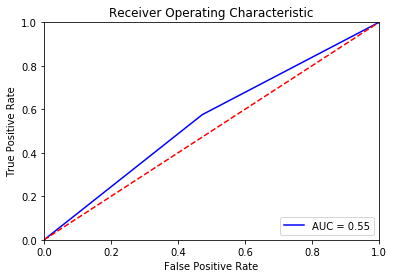

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)* 100)
print("ROC_AUC : ", roc_auc_score(y_test, y_pred) * 100)

# ROC Graph
y_test_pred_score = logreg.predict_proba(X_test)
preds = y_pred#y_test_pred_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54    337563
           1       0.55      0.58      0.56    337562

    accuracy                           0.55    675125
   macro avg       0.55      0.55      0.55    675125
weighted avg       0.55      0.55      0.55    675125



In [183]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
pipeline_RF = Pipeline([('StandardScaler', StandardScaler()), 
                    ('RandomForestClassifier', RandomForestClassifier())])

pipeline_RF.fit(X_train,y_train)
pipeline_RF.score(X_test, y_test)

0.7790053693760415

In [186]:
y_pred = pipeline_RF.predict(X_test)

In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
acc = accuracy_score(y_test, y_pred) * 100
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
df_cm

77.90053693760414


,0,1
0,253534,84029
1,65170,272392


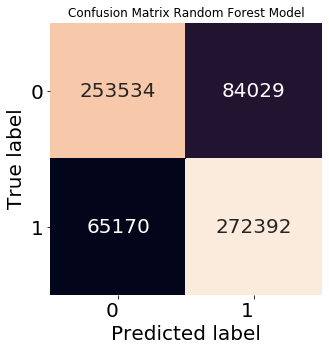

In [199]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = [0,1]

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

import seaborn as sns
plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)

hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.title("Confusion Matrix Random Forest Model")
# plt.tight_layout()
plt.show()

distanceFromDPinMiles_SQR     0.373256
distanceFromDPinMiles         0.371512
average_minutes_per_hh_SQR    0.112533
average_minutes_per_hh        0.112519
size_of_hh                    0.006691
size_of_hh_SQR                0.006428
date_Tuesday                  0.003676
date_Saturday                 0.003149
date_Sunday                   0.003122
date_Wednesday                0.002589
date_Monday                   0.002360
date_Thursday                 0.002165
dtype: float64


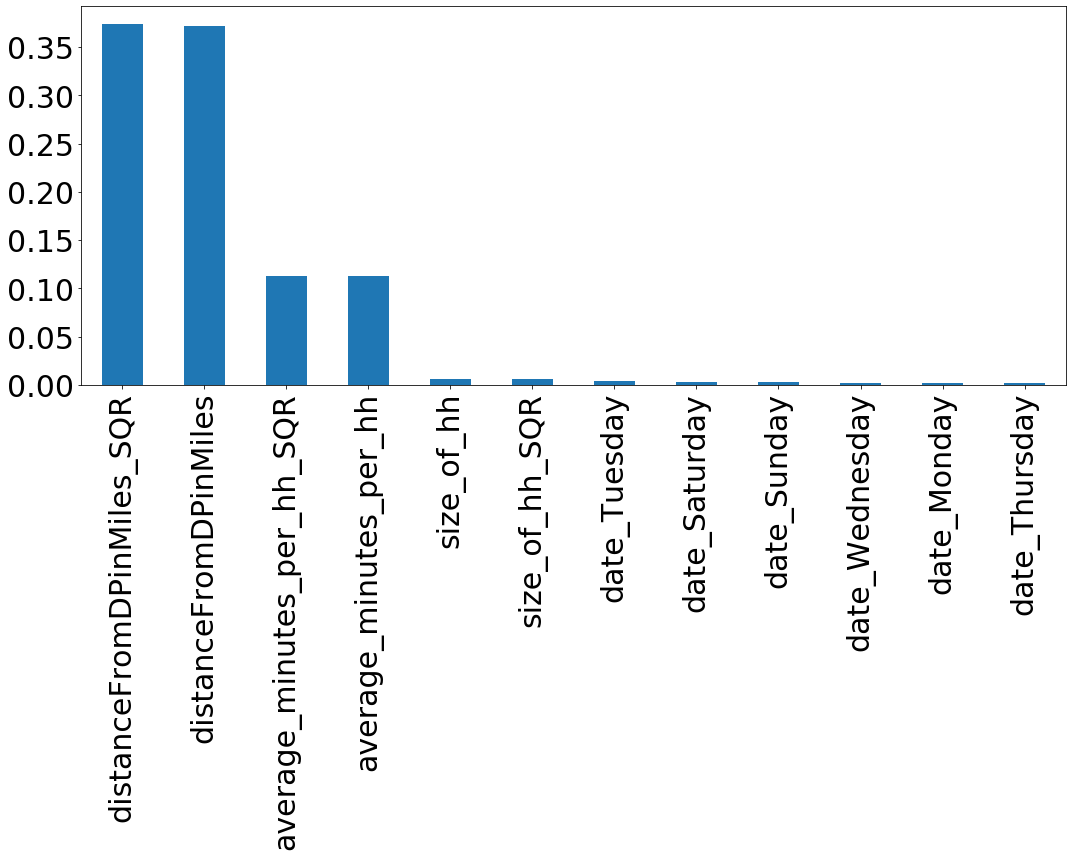

In [188]:
#Feature Importance

import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding X_train column names as axis labels
f_importances = pd.Series(pipeline_RF.named_steps['RandomForestClassifier'].feature_importances_, X_Columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
print(f_importances)
# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(15,12), rot=90, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

77.90053693760414
ROC_AUC :  77.9005410751726


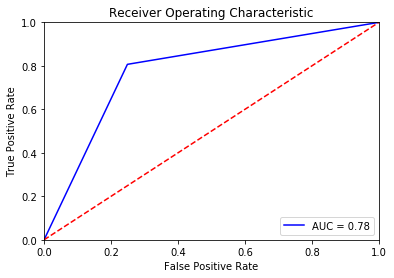

In [200]:
#AUC and ROC 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)* 100)
print("ROC_AUC : ", roc_auc_score(y_test, y_pred) * 100)

# ROC Graph
y_test_pred_score = pipeline_RF.predict_proba(X_test)
preds = y_pred#y_test_pred_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77    337563
           1       0.76      0.81      0.79    337562

    accuracy                           0.78    675125
   macro avg       0.78      0.78      0.78    675125
weighted avg       0.78      0.78      0.78    675125



In [256]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
pipeline_GBC = Pipeline([('StandardScaler', StandardScaler()), 
                    ('GradientBoostingClassifier', GradientBoostingClassifier())])

pipeline_GBC.fit(X_train,y_train)
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(pipeline_GBC.score(X_test, y_test)))

Accuracy of Gradient Boosting classifier on test set: 0.62


In [210]:
#XG Boost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
pipeline_XGB = Pipeline([('StandardScaler', StandardScaler()), 
                    ('XGBClassifier', XGBClassifier())])

pipeline_XGB.fit(X_train,y_train)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(pipeline_XGB.score(X_test, y_test)))

Accuracy of XGBoost classifier on test set: 0.62


In [211]:
y_pred = pipeline_XGB.predict(X_test)

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65    337563
           1       0.64      0.54      0.59    337562

    accuracy                           0.62    675125
   macro avg       0.62      0.62      0.62    675125
weighted avg       0.62      0.62      0.62    675125



61.91475652656916
ROC_AUC :  61.914744653791395


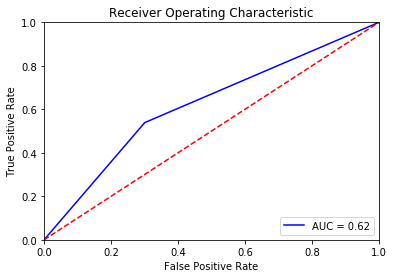

In [213]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)* 100)
print("ROC_AUC : ", roc_auc_score(y_test, y_pred) * 100)

# ROC Graph
y_test_pred_score = pipeline_RF.predict_proba(X_test)
preds = y_pred#y_test_pred_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
#Random Forest with K fold cross validation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Create the pipeline with StandardScaler and RandomForestClassifier
pipe_rf = Pipeline([('StandardScaler', StandardScaler()), 
                    ('RandomForestClassifier', RandomForestClassifier())])

pipe_rf.fit(X_train, y_train)
# Get the list of accuracy obtained by cross_val_score (using KFold, and tha above n_splits and random_state)
rf_score = cross_val_score(pipe_rf, X_train, y_train, cv=KFold(n_splits=10, random_state=123))
# Get the average accuracy of each model obtained by cross validation
rf_score.mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7756970314309635

In [51]:
#Prediction
y_pred = pipe_rf.predict(X_test)

In [52]:
#Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
acc = accuracy_score(y_test, y_pred) * 100
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )
df_cm

77.89313090168487


,0,1
0,253421,84142
1,65107,272455


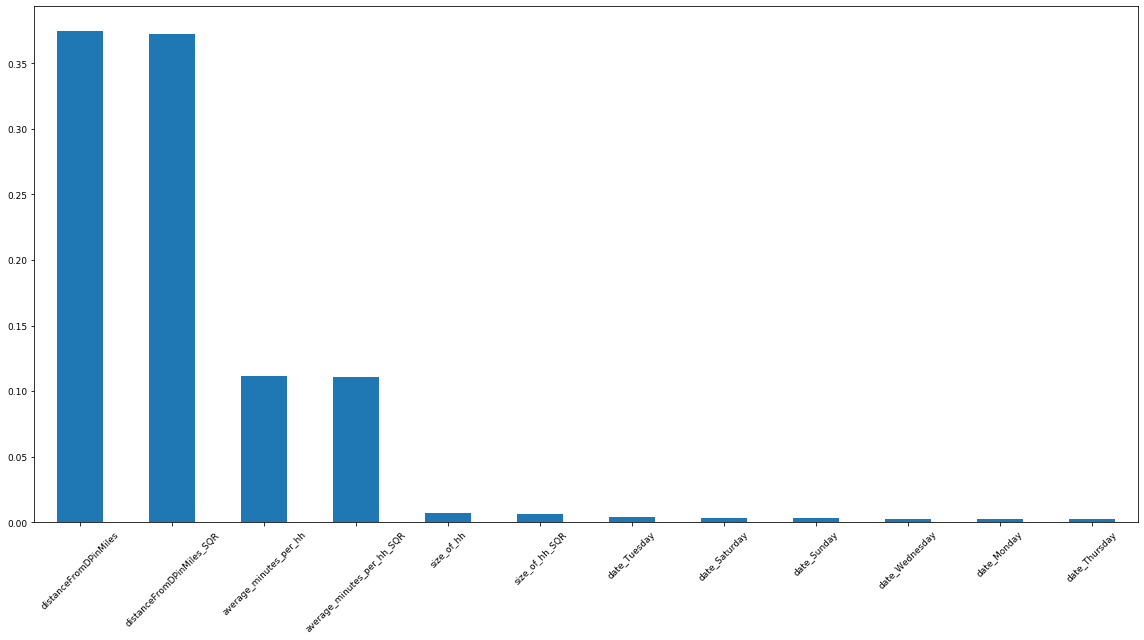

In [53]:
#Feature importance
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, X_Columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()